# Exploratory Data Analysis

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import csv, create dataframe, and examine data as is.

In [2]:
df = pd.read_csv('fundamental_data.csv')
df.drop(['trailing_eps', 'price_to_trailing_earnings'], axis=1, inplace=True)

In [3]:
print(df.shape)
df.head(10)

(1765, 18)


,ticker,company_name,price,shares_outstanding,market_cap,52_week_delta,dividend_payout_ratio,foward_eps,g_revenue,gross_margin_pct,ebitda_margin_pct,price_to_foward_earnings,price_to_book,debt_to_equity,return_on_assets,return_on_equity,largest_institutional_owner,recommendation
0,FLWS,"1-800 FLOWERS.COM, Inc.",12.84,36047600,4.628512e+08,0.034510493,0.0000,0.68,0.105,0.42145,0.06150,18.882,2.516167,52.765,0.04989,0.11756,Dimensional Fund Advisors LP,buy
1,TWOU,"2U, Inc.",22.99,63476900,1.459334e+09,-0.5976813,0.0000,-1.09,0.438,0.73874,-0.11690,-21.092,1.988066,42.584,-0.07259,-0.26075,"Vanguard Group, Inc. (The)",hold
2,DDD,3D Systems Corporation,8.55,118421000,1.012500e+09,-0.26782608,0.0000,0.09,-0.056,0.44765,-0.00901,95.000,1.950274,19.777,-0.04547,-0.12539,Blackrock Inc.,hold
3,MMM,3M Company,171.47,575051008,9.860400e+10,-0.17118806,0.6738,9.69,-0.020,0.48029,0.24773,17.696,9.213368,189.511,0.10052,0.47079,"Vanguard Group, Inc. (The)",hold
4,AOS,A.O. Smith Corporation,46.79,137059008,6.412991e+09,0.091459155,0.3667,2.53,-0.034,0.40032,0.19242,18.494,4.608036,22.401,0.10481,0.23737,"Vanguard Group, Inc. (The)",buy
5,ATEN,"A10 Networks, Inc.",6.32,76818496,4.854929e+08,-0.015673995,0.0000,0.17,-0.127,0.77000,-0.04811,37.176,4.748310,4.296,-0.05398,-0.19359,"Summit Partners, L.P.",hold
6,AIR,AAR Corp.,44.96,34970300,1.572265e+09,0.092778444,0.1266,2.96,0.161,0.15980,0.07353,15.189,1.702385,31.776,0.04381,0.08952,Blackrock Inc.,buy
7,AAN,"Aaron's, Inc.",59.05,67151800,3.965314e+09,0.32526267,0.0481,4.49,0.011,0.47809,0.16109,13.151,2.123108,38.634,0.11479,0.11031,Blackrock Inc.,strong_buy
8,ABT,Abbott Laboratories,85.48,1768460032,1.511680e+11,0.20191765,0.6739,3.60,0.055,0.58817,0.24710,23.744,4.751265,62.466,0.04215,0.10468,"Vanguard Group, Inc. (The)",buy
9,ANF,Abercrombie & Fitch Company,16.90,62757000,1.060593e+09,-0.1253277,1.0811,1.25,0.003,0.59667,0.08201,13.520,1.078356,177.051,0.02849,0.05461,Blackrock Inc.,hold


In [4]:
df.isna().sum()

ticker                         0
company_name                   0
price                          0
shares_outstanding             0
market_cap                     0
52_week_delta                  0
dividend_payout_ratio          0
foward_eps                     0
g_revenue                      0
gross_margin_pct               0
ebitda_margin_pct              0
price_to_foward_earnings       0
price_to_book                  0
debt_to_equity                 0
return_on_assets               0
return_on_equity               0
largest_institutional_owner    0
recommendation                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 18 columns):
ticker                         1765 non-null object
company_name                   1765 non-null object
price                          1765 non-null float64
shares_outstanding             1765 non-null int64
market_cap                     1765 non-null float64
52_week_delta                  1765 non-null object
dividend_payout_ratio          1765 non-null float64
foward_eps                     1765 non-null float64
g_revenue                      1765 non-null float64
gross_margin_pct               1765 non-null float64
ebitda_margin_pct              1765 non-null float64
price_to_foward_earnings       1765 non-null float64
price_to_book                  1765 non-null float64
debt_to_equity                 1765 non-null float64
return_on_assets               1765 non-null float64
return_on_equity               1765 non-null float64
largest_institutional_owner    1765 non-null objec

### Column '52_week_delta' is type object instead of float. This needs to be corrected

In [6]:
df['52_week_delta'] = df['52_week_delta'].map(lambda x: float(x))

In [7]:
df['52_week_delta'].value_counts()

 0.154979    4
 0.087824    3
 inf         2
 0.422670    2
 0.046180    1
            ..
 0.455766    1
 0.383554    1
 0.649002    1
 0.195520    1
-0.062500    1
Name: 52_week_delta, Length: 1758, dtype: int64

### Other cleaning needed

#### Steps taken:
1. Drop the 2 companies that have 'inf' for 52_week_change. This is because they became public this year and are too young for proper analyst recommendations.


2. Drop the 'shares_outstanding' column and take the log of market_cap. We will then drop the market_cap column


3. Set a limits on our features view more normal companies.


4. Only analyze companies held by the top 5 institutional holders

In [8]:
# step 1
df = df[(df['52_week_delta'] != np.inf)]

# step 2
df['log_mktcap'] = np.log(df['market_cap'])
df.drop(['market_cap', 'shares_outstanding'], axis=1, inplace=True)

# step 3
df = df[
    ((df['dividend_payout_ratio'] < 1) & (df['dividend_payout_ratio'] >= 0)) &
    ((df['foward_eps'] <= 500) & (df['foward_eps'] >= -500)) &
    ((df['price_to_foward_earnings'] <= 500) & (df['price_to_foward_earnings'] >= -500)) &
    ((df['price_to_book'] <= 25) & (df['price_to_book'] >= 0)) &
    ((df['gross_margin_pct'] < 1)) &
    ((df['debt_to_equity'] <= 500) & (df['debt_to_equity'] >= 0))
]

# step 4
df = df[
    (df['largest_institutional_owner'] == 'Blackrock Inc.') | 
    (df['largest_institutional_owner'] == 'Vanguard Group, Inc. (The)') | 
    (df['largest_institutional_owner'] == 'Price (T.Rowe) Associates Inc') | 
    (df['largest_institutional_owner'] == 'FMR, LLC') | 
    (df['largest_institutional_owner'] == 'Dimensional Fund Advisors LP') 
]

In [9]:
print('Continuous Variables')
print('--'*40)
print(df[['price', 'log_mktcap', '52_week_delta', 'dividend_payout_ratio',
          'foward_eps', 'g_revenue', 'gross_margin_pct',
          'ebitda_margin_pct', 'price_to_foward_earnings', 'price_to_book', 'debt_to_equity',
          'return_on_assets', 'return_on_equity']].describe().transpose())
print('--'*40)

Continuous Variables
--------------------------------------------------------------------------------
                           count       mean         std         min  \
price                     1057.0  84.722802  165.229778    0.249100   
log_mktcap                1057.0  22.090362    1.722412   15.659536   
52_week_delta             1057.0   0.171899    0.375131   -0.973558   
dividend_payout_ratio     1057.0   0.216545    0.255422    0.000000   
foward_eps                1057.0   4.219376    8.356185  -14.570000   
g_revenue                 1057.0   0.114439    1.069088   -0.997000   
gross_margin_pct          1057.0   0.407889    0.255222   -2.557690   
ebitda_margin_pct         1057.0   0.166522    0.224967   -2.754050   
price_to_foward_earnings  1057.0  19.054578   34.578194 -306.000000   
price_to_book             1057.0   4.215945    4.056736    0.045546   
debt_to_equity            1057.0  95.779043   90.361990    0.059000   
return_on_assets          1057.0   0.040716   

## Visualize our data

### Target Varaible

In [10]:
# Analyst Rating Count
print('Target Variable')
print(df.groupby(['recommendation']).recommendation.count())

Target Variable
recommendation
buy             674
hold            332
strong_buy       45
underperform      6
Name: recommendation, dtype: int64


In [11]:
# Statistical summary of continuous variables 
print('Statistical Summary of Continuous Variables Grouped By Target Variable')

print('Strong Buys')
print(df[df['recommendation'] == 'strong_buy'][['price', 'log_mktcap', '52_week_delta', 'dividend_payout_ratio',
          'foward_eps', 'g_revenue', 'gross_margin_pct',
          'ebitda_margin_pct', 'price_to_foward_earnings', 'price_to_book', 'debt_to_equity',
          'return_on_assets', 'return_on_equity']].describe().transpose())
print('--'*40, '\n')


print('Buys')
print(df[df['recommendation'] == 'buy'][['price', 'log_mktcap', '52_week_delta', 'dividend_payout_ratio',
          'foward_eps', 'g_revenue', 'gross_margin_pct',
          'ebitda_margin_pct', 'price_to_foward_earnings', 'price_to_book', 'debt_to_equity',
          'return_on_assets', 'return_on_equity']].describe().transpose())
print('--'*40, '\n')

print('Holds')
print(df[df['recommendation'] == 'hold'][['price', 'log_mktcap', '52_week_delta', 'dividend_payout_ratio',
          'foward_eps', 'g_revenue', 'gross_margin_pct',
          'ebitda_margin_pct', 'price_to_foward_earnings', 'price_to_book', 'debt_to_equity',
          'return_on_assets', 'return_on_equity']].describe().transpose())
print('--'*40, '\n')

print('Underperformers')
print(df[df['recommendation'] == 'underperform'][['price', 'log_mktcap', '52_week_delta', 'dividend_payout_ratio',
          'foward_eps', 'g_revenue', 'gross_margin_pct',
          'ebitda_margin_pct', 'price_to_foward_earnings', 'price_to_book', 'debt_to_equity',
          'return_on_assets', 'return_on_equity']].describe().transpose())
print('--'*40)

Statistical Summary of Continuous Variables Grouped By Target Variable
Strong Buys
                          count       mean        std         min        25%  \
price                      45.0  51.672556  67.087577    1.570000  18.440000   
log_mktcap                 45.0  20.858948   1.476166   17.634157  20.142898   
52_week_delta              45.0   0.150429   0.389266   -0.521084  -0.120770   
dividend_payout_ratio      45.0   0.140153   0.230352    0.000000   0.000000   
foward_eps                 45.0   2.221556   2.878062   -2.740000   0.390000   
g_revenue                  45.0   0.201267   0.459207   -0.323000   0.011000   
gross_margin_pct           45.0   0.412977   0.225193    0.000000   0.270120   
ebitda_margin_pct          45.0   0.090180   0.198927   -0.898980   0.037170   
price_to_foward_earnings   45.0   7.957289  56.608792 -233.081000   9.535000   
price_to_book              45.0   4.036699   3.610508    0.501750   1.979095   
debt_to_equity             45.0  72.2

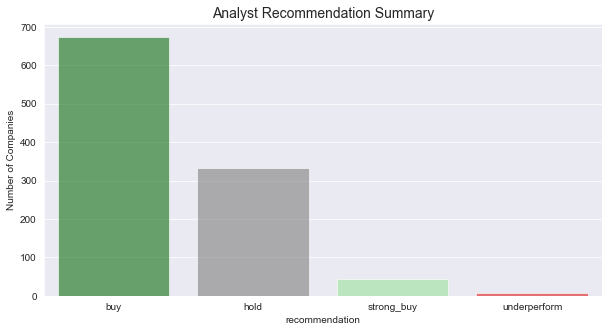

In [12]:
# Target Variable Countplot
sns.set_style('darkgrid');
plt.figure(figsize = (10,5));
sns.countplot(df['recommendation'], alpha =.6, palette= ['green', 'gray', 'lightgreen','red']);
plt.title('Analyst Recommendation Summary', fontsize=14);
plt.ylabel('Number of Companies');
plt.show();

Let's group the recommendations together by "Buy" and "Not Buy" and visualize the results

In [13]:
buy_recos = ['buy', 'strong_buy']
hold_sell_recos = ['hold', 'underperform']

df['analyst_rating'] = ''

for i in range(df.shape[0]):
    if df['recommendation'].iloc[i] in buy_recos:
        df['analyst_rating'].iloc[i] = 1
    else:
        df['analyst_rating'].iloc[i] = 0
        
df.drop('recommendation', axis=1, inplace=True)

In [14]:
# Analyst Rating Count
print("Target Variable (0 = 'Not_Buy' and 1 = 'Buy')")
print(df.groupby(['analyst_rating']).analyst_rating.count())

Target Variable (0 = 'Not_Buy' and 1 = 'Buy')
analyst_rating
0    338
1    719
Name: analyst_rating, dtype: int64


In [15]:
# Statistical summary of continuous variables 
print('Statistical Summary of Continuous Variables Grouped By Target Variable')

print('Buys')
print(df[df['analyst_rating'] == 1][['price', 'log_mktcap', '52_week_delta', 'dividend_payout_ratio',
          'foward_eps', 'g_revenue', 'gross_margin_pct',
          'ebitda_margin_pct', 'price_to_foward_earnings', 'price_to_book', 'debt_to_equity',
          'return_on_assets', 'return_on_equity']].describe().transpose())
print('--'*40, '\n')


print('Not_Buys')
print(df[df['analyst_rating'] == 0][['price', 'log_mktcap', '52_week_delta', 'dividend_payout_ratio',
          'foward_eps', 'g_revenue', 'gross_margin_pct',
          'ebitda_margin_pct', 'price_to_foward_earnings', 'price_to_book', 'debt_to_equity',
          'return_on_assets', 'return_on_equity']].describe().transpose())
print('--'*40)

Statistical Summary of Continuous Variables Grouped By Target Variable
Buys
                          count       mean         std         min        25%  \
price                     719.0  90.998855  183.620303    0.249100  27.890000   
log_mktcap                719.0  22.172976    1.806633   15.659536  21.038207   
52_week_delta             719.0   0.214123    0.377870   -0.973558   0.007281   
dividend_payout_ratio     719.0   0.185786    0.242726    0.000000   0.000000   
foward_eps                719.0   4.422295    9.632498  -14.570000   1.385000   
g_revenue                 719.0   0.159473    1.286566   -0.997000  -0.007000   
gross_margin_pct          719.0   0.417431    0.275854   -2.557690   0.244060   
ebitda_margin_pct         719.0   0.164680    0.246521   -2.754050   0.079625   
price_to_foward_earnings  719.0  19.326417   35.478264 -233.081000  11.789000   
price_to_book             719.0   4.500164    4.274059    0.142159   1.823126   
debt_to_equity            719.0  

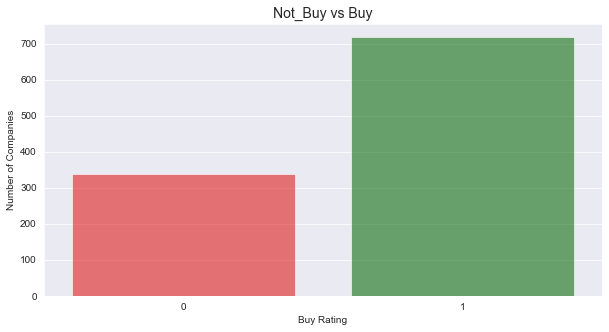

In [16]:
# Target Variable Countplot
sns.set_style('darkgrid');
plt.figure(figsize = (10,5));
sns.countplot(df['analyst_rating'], alpha =.6, palette= ['red', 'green']);
plt.title('Not_Buy vs Buy', fontsize=14);
plt.ylabel('Number of Companies');
plt.xlabel('Buy Rating')
plt.show();

#### Examine Numerical Correlations

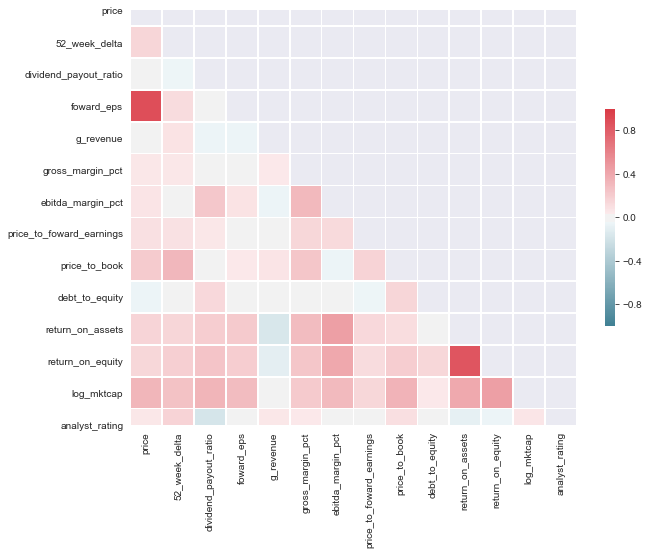

In [17]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

#create mask
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#create color scheme
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df.corr(), mask=mask, cmap=cmap,
            center=0, vmin=-1, vmax=1,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, ax=ax);

### Discrete Variable

Institutional Owernship Summary
largest_institutional_owner
Blackrock Inc.                   497
Vanguard Group, Inc. (The)       411
Price (T.Rowe) Associates Inc     73
FMR, LLC                          47
Dimensional Fund Advisors LP      29
Name: largest_institutional_owner, dtype: int64


Institutional Owernship Summary
analyst_rating                   0    1
largest_institutional_owner            
Blackrock Inc.                 171  326
Dimensional Fund Advisors LP     9   20
FMR, LLC                         9   38
Price (T.Rowe) Associates Inc   15   58
Vanguard Group, Inc. (The)     134  277


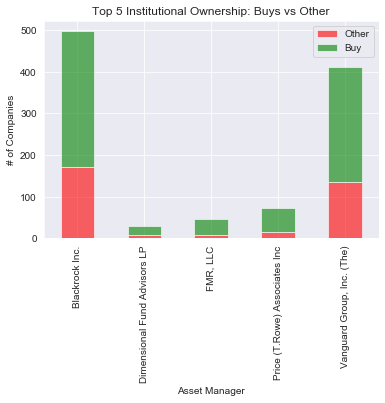

In [18]:
print('Institutional Owernship Summary')
print(df.groupby('largest_institutional_owner').largest_institutional_owner.count().sort_values(ascending=False))
print('\n')

# Institutional owernship summary
print('Institutional Owernship Summary')
print(df.groupby(['largest_institutional_owner','analyst_rating']).largest_institutional_owner.count().unstack())

# Institutional ownership visualization
top5 = df.groupby(['largest_institutional_owner','analyst_rating']).largest_institutional_owner.count().unstack();
p1 = top5.plot(kind ='bar', stacked = True, 
                   title = 'Top 5 Institutional Ownership: Buys vs Other', 
                   color = ['red', 'green'], alpha = .6);
p1.set_xlabel('Asset Manager');
p1.set_ylabel('# of Companies');
p1.legend(['Other','Buy']);
plt.show();

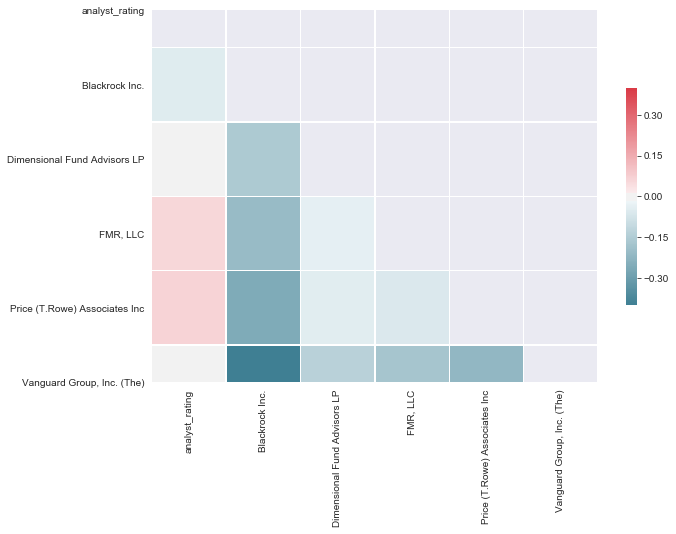

In [19]:
# prepare data for a correlation matrix
inst_dummies = pd.get_dummies(df['largest_institutional_owner'])

df_inst = df[['largest_institutional_owner', 'analyst_rating']]
df_inst.drop('largest_institutional_owner', axis=1, inplace=True)
df_inst = pd.concat([df_inst, inst_dummies], axis=1)

#create figure
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

#create mask
mask = np.zeros_like(df_inst.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#create color scheme
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(df_inst.corr(), mask=mask, cmap=cmap,
            center=0, vmin=-0.4, vmax=0.4,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.5}, ax=ax);

### Continuous Variables

Let's visualize each continuous feature

#### Market Cap

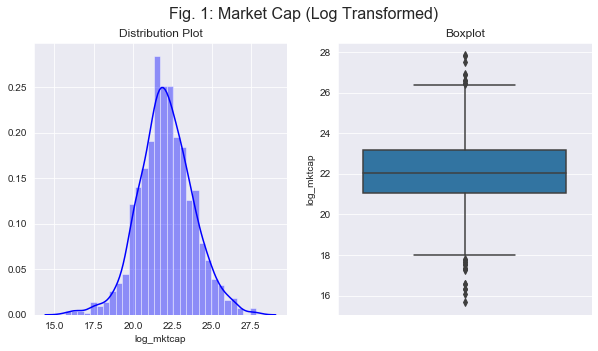

In [20]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 1: Market Cap (Log Transformed)', fontsize=16);

ax1 = fig.add_subplot(121);
sns.distplot(df['log_mktcap'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');

ax2 = fig.add_subplot(122);
sns.boxplot(df['log_mktcap'], orient='v');
ax2.set_title('Boxplot');

#### Dividend Payout Ratio

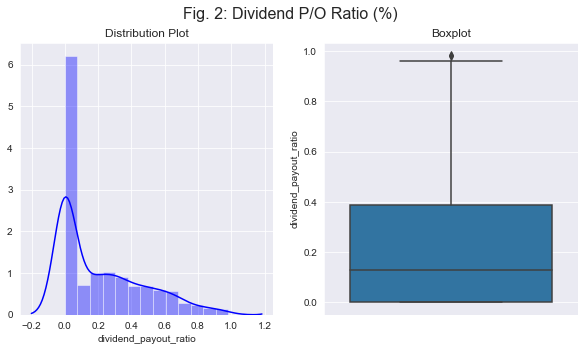

In [21]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 2: Dividend P/O Ratio (%)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['dividend_payout_ratio'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');

ax2 = fig.add_subplot(122);
sns.boxplot(df['dividend_payout_ratio'], orient='v', ax=ax2);
ax2.set_title('Boxplot');

#### Earnings Per Share

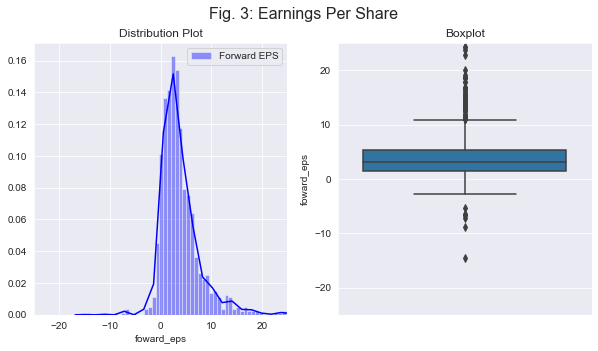

In [22]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 3: Earnings Per Share', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['foward_eps'], bins='auto', color='b', ax=ax1, label='Forward EPS');
ax1.set_title('Distribution Plot');
ax1.legend();
ax1.set_xlim(-25,25);

ax2 = fig.add_subplot(122);
sns.boxplot(df['foward_eps'], orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-25,25);

#### Price to Earnings (P/E)

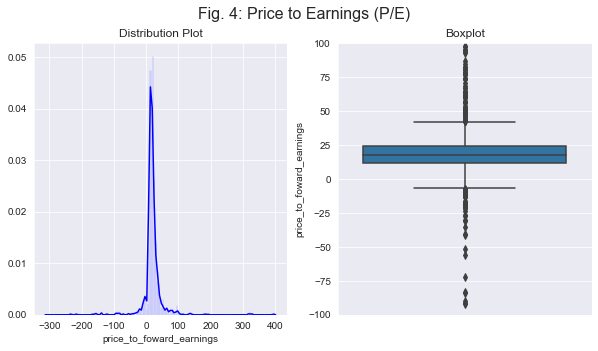

In [23]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 4: Price to Earnings (P/E)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['price_to_foward_earnings'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');

ax2 = fig.add_subplot(122);
sns.boxplot(df['price_to_foward_earnings'], orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-100,100);

#### Price to Book (P/B)

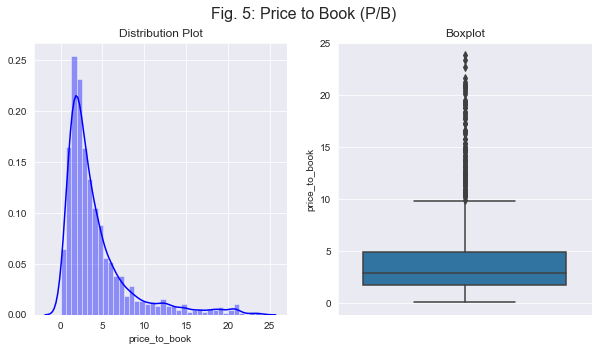

In [24]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 5: Price to Book (P/B)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['price_to_book'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');

ax2 = fig.add_subplot(122);
sns.boxplot(df['price_to_book'], orient='v', ax=ax2);
ax2.set_title('Boxplot');

#### Revenue Growth Rate

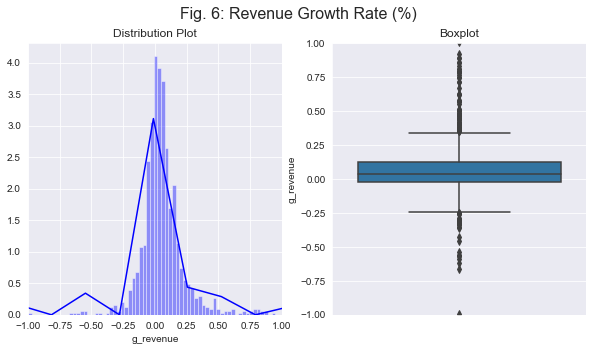

In [25]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 6: Revenue Growth Rate (%)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['g_revenue'], bins='auto', color='b', ax=ax1);
ax1.set_title('Distribution Plot');
ax1.set_xlim(-1,1);

ax2 = fig.add_subplot(122);
sns.boxplot(df['g_revenue'], orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-1,1);

### Margins

In [26]:
gross = df['gross_margin_pct'].tolist()
ebitda = df['ebitda_margin_pct'].tolist()

x = []
y = []

margins = [
    {
        'type' : 'gross',
        'data' : gross
    },
    {
        'type' : 'ebitda',
        'data' : ebitda
    }
]

for margin_type in margins:
    for i in range(len(gross)):
        x.append(margin_type['type'])
        y.append(margin_type['data'][i])

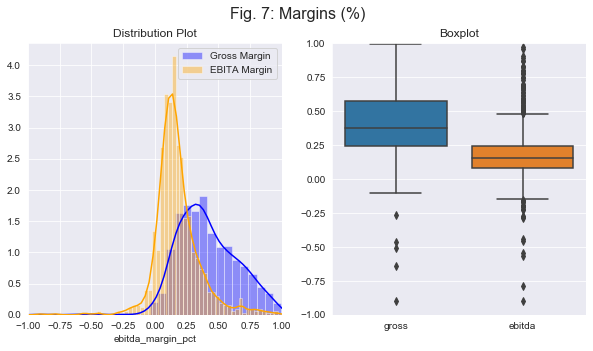

In [27]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 7: Margins (%)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['gross_margin_pct'], bins='auto', color='b', ax=ax1, label='Gross Margin');
sns.distplot(df['ebitda_margin_pct'], bins='auto', color='orange', ax=ax1, label='EBITA Margin');
ax1.set_title('Distribution Plot');
ax1.legend();
ax1.set_xlim(-1,1);

ax2 = fig.add_subplot(122);
sns.boxplot(x, y, orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-1,1);

#### Debt-to-Equity (D/B)

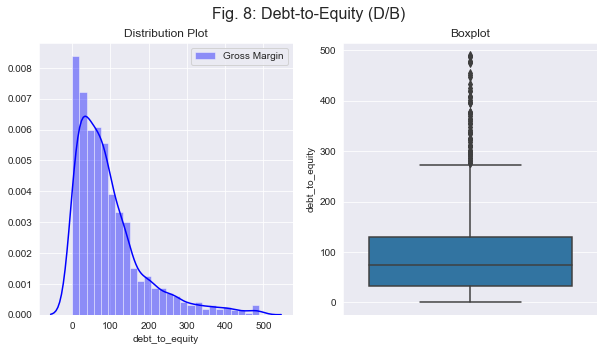

In [28]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 8: Debt-to-Equity (D/B)', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['debt_to_equity'], bins='auto', color='b', ax=ax1, label='Gross Margin');
ax1.set_title('Distribution Plot');
ax1.legend();

ax2 = fig.add_subplot(122);
sns.boxplot(df['debt_to_equity'], orient='v', ax=ax2);
ax2.set_title('Boxplot');

#### Performance Metrics

In [29]:
fifty_two = df['52_week_delta'].tolist()
roa = df['return_on_assets'].tolist()
roe = df['return_on_equity'].tolist()

x = []
y = []

performance_metrics = [
    {
        'type' : 'fifty_two',
        'data' : fifty_two
    },
    {
        'type' : 'roa',
        'data' : roa
    },
    {
        'type' : 'roe',
        'data' : roe
    }
]

for performance_metric in performance_metrics:
    for i in range(len(fifty_two)):
        x.append(performance_metric['type'])
        y.append(performance_metric['data'][i])

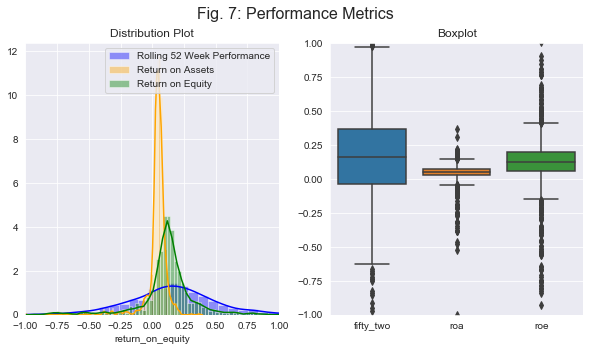

In [30]:
fig = plt.figure(figsize=(10,5));
fig.suptitle('Fig. 7: Performance Metrics', fontsize=16)

ax1 = fig.add_subplot(121);
sns.distplot(df['52_week_delta'], bins='auto', color='b', ax=ax1, label='Rolling 52 Week Performance');
sns.distplot(df['return_on_assets'], bins='auto', color='orange', ax=ax1, label='Return on Assets');
sns.distplot(df['return_on_equity'], bins='auto', color='green', ax=ax1, label='Return on Equity');
ax1.set_title('Distribution Plot');
ax1.legend();
ax1.set_xlim(-1,1);

ax2 = fig.add_subplot(122);
sns.boxplot(x, y, orient='v', ax=ax2);
ax2.set_title('Boxplot');
ax2.set_ylim(-1, 1);

In [31]:
# save dataframe to csv
df.to_csv('final_fundamental_data.csv', index=False)